<a href="https://colab.research.google.com/github/IshaanMaheshwari22/TCS-iON-Forecasting-Retail-Demand/blob/main/Forecasting_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#!pip install pandas==1.2.0
!pip install xlrd==2.0.1
!pip install pystan==2.19
#!pip install fbprophet


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 4.6 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.2 MB 16 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0


In [3]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
from google.colab import drive
drive.mount('/content/gdrive')
import pandas as pd
import xlrd

Mounted at /content/gdrive


In [4]:
df = pd.read_excel('/content/gdrive/MyDrive/TCS-ION- internship /Superstore_Dataset.xlsm')
print(df.head())
print(df.tail())

   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0     1.0  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1     2.0  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2     3.0  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3     4.0  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4     5.0  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0     42420.0   South  FUR-BO-10

Order Date
2017-01-01    1195.218071
2017-02-01     430.501714
2017-03-01    1392.859250
2017-04-01     825.559133
2017-05-01     678.329400
2017-06-01     853.055000
2017-07-01    1054.996636
2017-08-01     978.842333
2017-09-01    1077.704120
2017-10-01    1493.439227
2017-11-01    1996.750920
2017-12-01     955.865652
Freq: MS, Name: Sales, dtype: float64


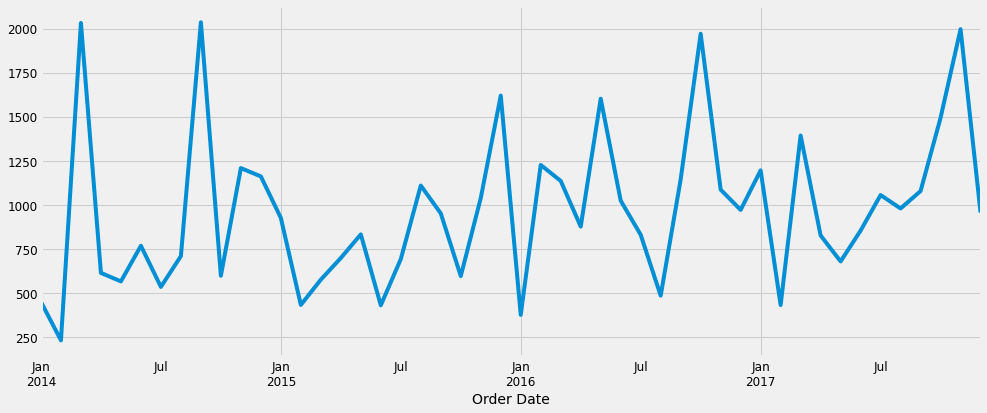

In [5]:
technology = df.loc[df['Category'] == 'Technology']
technology['Order Date'].min(), technology['Order Date'].max()
cols = ['Row ID','Order ID', 'Ship Date', 'Ship Mode', 'Customer ID','Customer Name','Segment','Country','City','State','Postal Code','Region','Product ID',
        'Category','Sub-Category','Product Name','Quantity','Discount','Profit']
technology.drop(cols, axis=1, inplace = True)
technology = technology.sort_values('Order Date')
technology.isnull().sum()
technology = technology.groupby('Order Date')['Sales'].sum().reset_index()
technology = technology.set_index('Order Date')
technology.index

y = technology['Sales'].resample('MS').mean()
print(y['2017':])
y.plot(figsize=(15,6))
plt.show()

In [16]:
print(technology.max())
print(technology.min())

Order Date    2017-12-01 00:00:00
Sales                 2035.838133
dtype: object
Order Date    2014-01-01 00:00:00
Sales                  229.787143
dtype: object


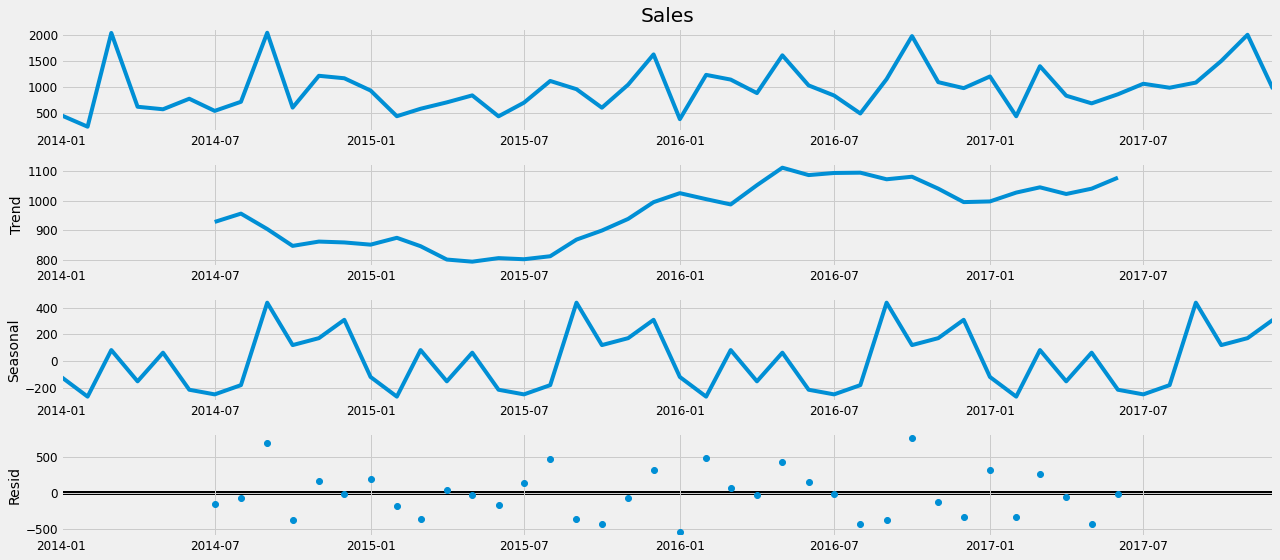

In [6]:
from pylab import rcParams
rcParams['figure.figsize'] = 18,10
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [7]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0],x[1],x[2],12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA......')
print('SARIMAX: {} x {}'.format(pdq[1],seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1],seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2],seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2],seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA......
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [8]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
          continue
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:791.4891765009955
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:1368.1106630794795
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:549.0156237882129


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:356.47255193990713
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:564.1031529698099


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:1442.7120926416446
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:372.6612068172691
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:357.88452536995715
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:750.8969484750883
ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:2754.75788857582


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:535.0489454747286
ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:341.18923596703087
ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:566.082790402832
ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:2619.7217588824765
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:373.876006586868
ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:342.63073634193603
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:729.3478530285049
ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1396.1093533465018
ARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:562.7585881681283


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:355.1666159145804
ARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:543.3082156228088


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1443.3173647704161
ARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:377.035448143496
ARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:357.14538297557567
ARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:675.9599897483579


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1929.412224995669
ARIMA(0, 1, 1)x(0, 1, 0, 12) - AIC:517.5329284811347
ARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC:325.1394965647118
ARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:526.5542322434078


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:722.279499416625
ARIMA(0, 1, 1)x(1, 1, 0, 12) - AIC:359.523084275441
ARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC:326.8769429971121
ARIMA(1, 0, 0)x(0, 0, 0, 12) - AIC:742.0250351345342
ARIMA(1, 0, 0)x(0, 0, 1, 12) - AIC:1740.380463368828


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 1, 0, 12) - AIC:550.272134077019
ARIMA(1, 0, 0)x(0, 1, 1, 12) - AIC:358.32500100246517
ARIMA(1, 0, 0)x(1, 0, 0, 12) - AIC:543.2786122758223


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12) - AIC:1298.6159947763601
ARIMA(1, 0, 0)x(1, 1, 0, 12) - AIC:359.3768706589716
ARIMA(1, 0, 0)x(1, 1, 1, 12) - AIC:359.66762575086307
ARIMA(1, 0, 1)x(0, 0, 0, 12) - AIC:699.8975570622575


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 12) - AIC:1935.1160986428467
ARIMA(1, 0, 1)x(0, 1, 0, 12) - AIC:536.899575110411
ARIMA(1, 0, 1)x(0, 1, 1, 12) - AIC:341.73604345687716
ARIMA(1, 0, 1)x(1, 0, 0, 12) - AIC:527.7942232886104


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12) - AIC:1244.7874554585662
ARIMA(1, 0, 1)x(1, 1, 0, 12) - AIC:361.31492579749505
ARIMA(1, 0, 1)x(1, 1, 1, 12) - AIC:343.4390168111142
ARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:717.9677328156988


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1581.3482166521312
ARIMA(1, 1, 0)x(0, 1, 0, 12) - AIC:555.4581770800667
ARIMA(1, 1, 0)x(0, 1, 1, 12) - AIC:352.88784627205973
ARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:522.5042506796423


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:1484.351091949473
ARIMA(1, 1, 0)x(1, 1, 0, 12) - AIC:355.12595472756215
ARIMA(1, 1, 0)x(1, 1, 1, 12) - AIC:354.8500621591758
ARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:677.6306925348991


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:2380.496705764925
ARIMA(1, 1, 1)x(0, 1, 0, 12) - AIC:518.790371045406
ARIMA(1, 1, 1)x(0, 1, 1, 12) - AIC:326.70087136575023
ARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:513.1256895923957


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:2192.5427757487673
ARIMA(1, 1, 1)x(1, 1, 0, 12) - AIC:343.60373359733467
ARIMA(1, 1, 1)x(1, 1, 1, 12) - AIC:328.3483915562635
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1726      0.286     -0.604      0.546      -0.732       0.387
ma.L1         -1.0000   2659.270     -0.000      1.000   -5213.074    5211.074
ma.S.L12      -1.0000   2659.368     -0.000      1.000   -5213.266    5211.266
sigma2      1.631e+05      0.010   1.59e+07      0.000    1.63e+05    1.63e+05


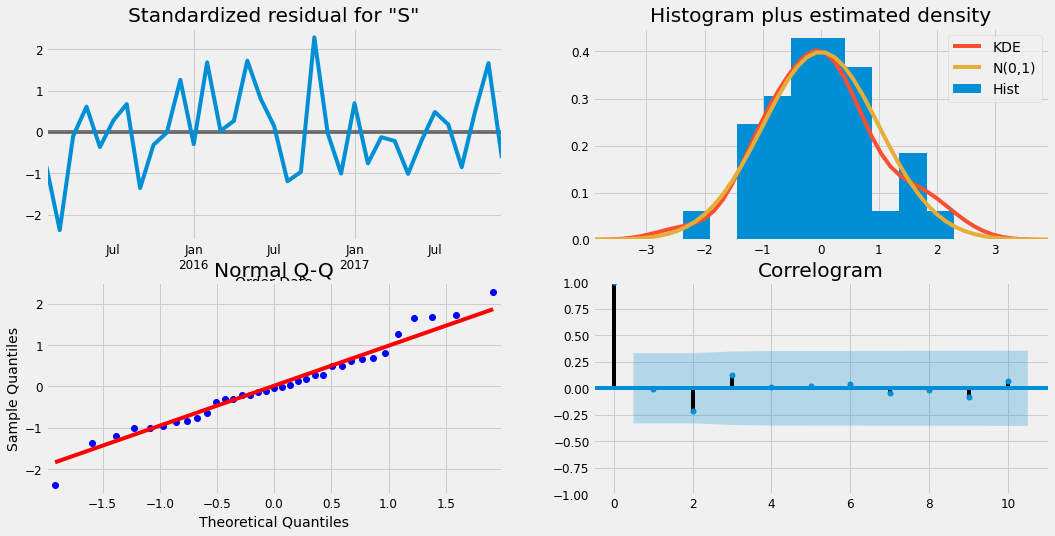

In [9]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

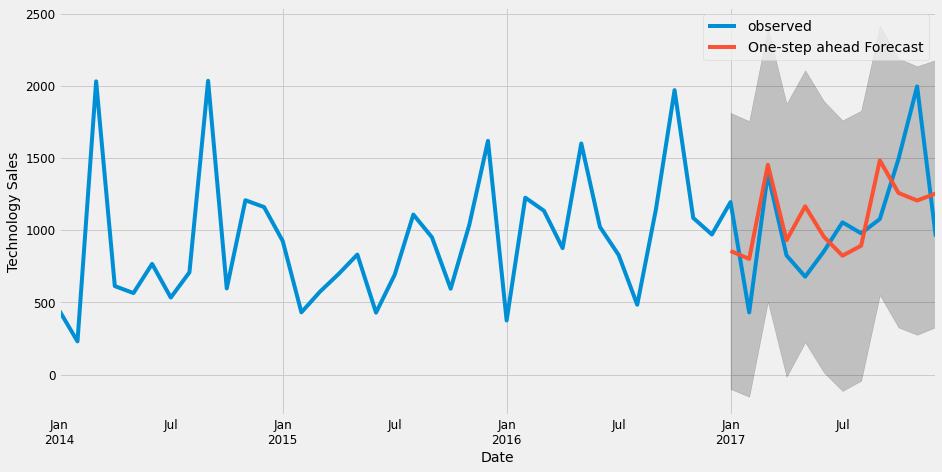

The Mean Squared Error of our forecasts is 125896.09
The Root Mean Squared Error of our forecasts is 354.82


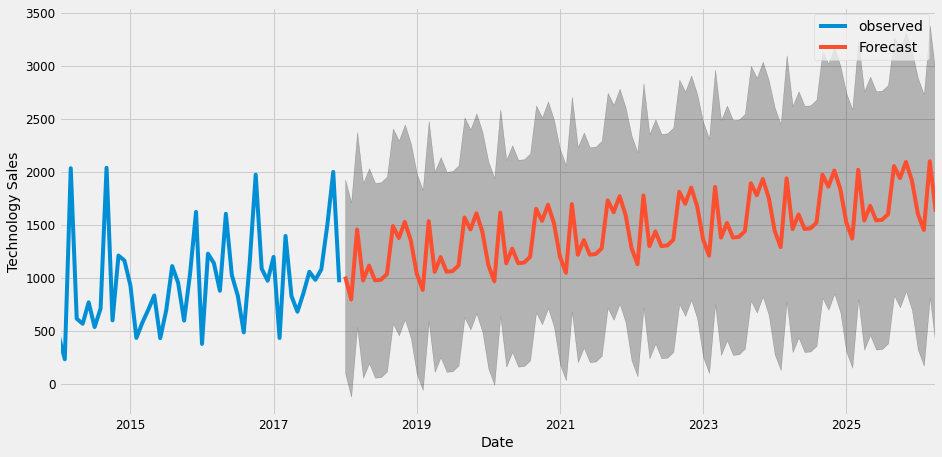

In [10]:

pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic = False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label = 'observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast' , alpha = 7, figsize=(14,7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color = 'k', alpha= .2)
ax.set_xlabel('Date')
ax.set_ylabel('Technology Sales')
plt.legend()
plt.show()
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01' :]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))
pred_uc = results.get_forecast(steps = 100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize = (14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color = 'k', alpha = .25)
ax.set_xlabel('Date')
ax.set_ylabel('Technology Sales')
plt.legend()
plt.show()

**Comparing different product sales.**

In [11]:
office = df.loc[df['Category'] == 'Office Supplies']
office['Order Date'].min(), office['Order Date'].max()
cols = ['Row ID','Order ID', 'Ship Date', 'Ship Mode', 'Customer ID','Customer Name','Segment','Country','City','State','Postal Code','Region','Product ID',
        'Category','Sub-Category','Product Name','Quantity','Discount','Profit']
office.drop(cols, axis=1, inplace = True)
office = office.sort_values('Order Date')
office.isnull().sum()
office = office.groupby('Order Date')['Sales'].sum().reset_index()
office = office.set_index('Order Date')
office.index
office1 = office['2017':]


furniture = df.loc[df['Category'] == 'Furniture']
furniture['Order Date'].min(), furniture['Order Date'].max()
cols = ['Row ID','Order ID', 'Ship Date', 'Ship Mode', 'Customer ID','Customer Name','Segment','Country','City','State','Postal Code','Region','Product ID',
        'Category','Sub-Category','Product Name','Quantity','Discount','Profit']
furniture.drop(cols, axis=1, inplace = True)
furniture = furniture.sort_values('Order Date')
furniture.isnull().sum()
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture = furniture.set_index('Order Date')
furniture1 = furniture['2017':]

technology = df.loc[df['Category'] == 'Technology']
technology['Order Date'].min(), technology['Order Date'].max()
cols = ['Row ID','Order ID', 'Ship Date', 'Ship Mode', 'Customer ID','Customer Name','Segment','Country','City','State','Postal Code','Region','Product ID',
        'Category','Sub-Category','Product Name','Quantity','Discount','Profit']
technology.drop(cols, axis=1, inplace = True)
technology = technology.sort_values('Order Date')
technology.isnull().sum()
technology = technology.groupby('Order Date')['Sales'].sum().reset_index()
technology = technology.set_index('Order Date')
technology1 = technology['2017':]

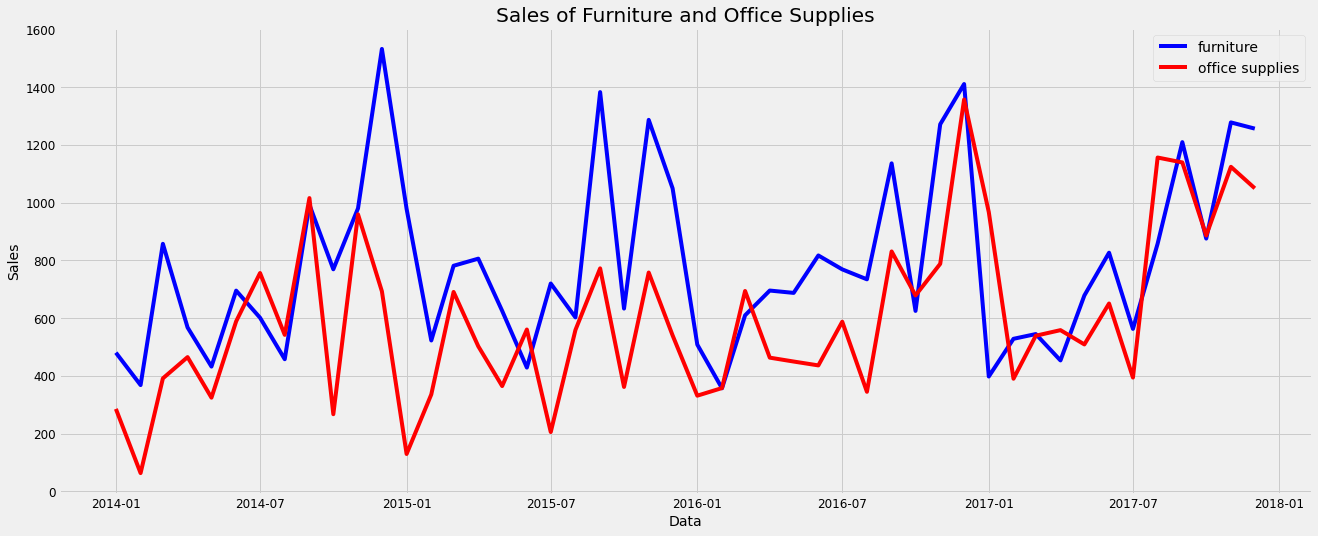

In [12]:

furniture = df.loc[df['Category'] == 'Furniture']
office = df.loc[df['Category'] == 'Office Supplies']
furniture.shape, office.shape
cols = ['Row ID','Order ID', 'Ship Date', 'Ship Mode', 'Customer ID','Customer Name','Segment','Country','City','State','Postal Code','Region','Product ID',
        'Category','Sub-Category','Product Name','Quantity','Discount','Profit']
furniture.drop(cols, axis=1, inplace=True)
office.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date')
office = office.sort_values('Order Date')
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
office = office.groupby('Order Date')['Sales'].sum().reset_index()
furniture = furniture.set_index('Order Date')
office = office.set_index('Order Date')

y_furniture = furniture['Sales'].resample('MS').mean()
y_office = office['Sales'].resample('MS').mean()
furniture = pd.DataFrame({'Order Date':y_furniture.index, 'Sales':y_furniture.values})
office = pd.DataFrame({'Order Date':y_office.index, 'Sales': y_office.values})

store = furniture.merge(office,how= 'inner',on='Order Date')
store.rename(columns={'Sales_x': 'furniture_sales', 'Sales_y': 'office_sales'}, inplace = True)
store.head()

plt.figure(figsize=(20,8))
plt.plot(store['Order Date'], store['furniture_sales'], 'b-', label = 'furniture')
plt.plot(store['Order Date'], store['office_sales'], 'r-', label = 'office supplies')
plt.xlabel('Data')
plt.ylabel('Sales')
plt.title('Sales of Furniture and Office Supplies')
plt.legend(["furniture","office supplies"],loc= "upper right")

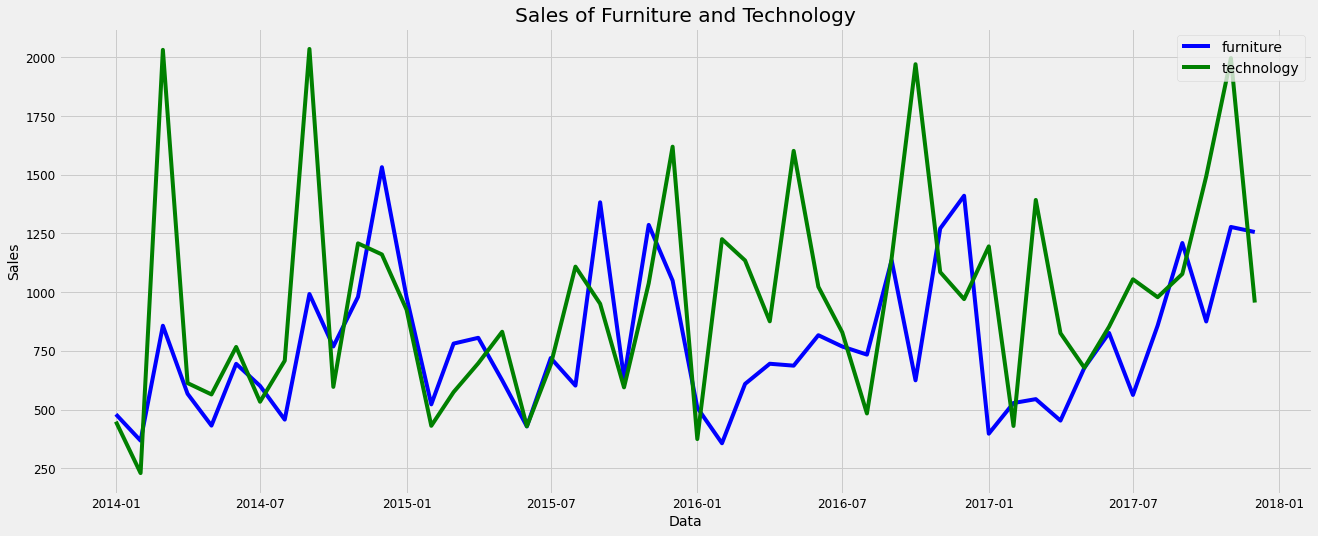

In [13]:

#Furniture and Technology
furniture = df.loc[df['Category'] == 'Furniture']
technology = df.loc[df['Category'] == 'Technology']
furniture.shape, technology.shape
cols = ['Row ID','Order ID', 'Ship Date', 'Ship Mode', 'Customer ID','Customer Name','Segment','Country','City','State','Postal Code','Region','Product ID',
        'Category','Sub-Category','Product Name','Quantity','Discount','Profit']
furniture.drop(cols, axis=1, inplace=True)
technology.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date')
technology = technology.sort_values('Order Date')
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
technology = technology.groupby('Order Date')['Sales'].sum().reset_index()
furniture = furniture.set_index('Order Date')
technology = technology.set_index('Order Date')

y_furniture = furniture['Sales'].resample('MS').mean()
y_technology = technology['Sales'].resample('MS').mean()
furniture = pd.DataFrame({'Order Date':y_furniture.index, 'Sales':y_furniture.values})
technology = pd.DataFrame({'Order Date':y_technology.index, 'Sales': y_technology.values})

store = furniture.merge(technology,how= 'inner',on='Order Date')
store.rename(columns={'Sales_x': 'furniture_sales', 'Sales_y': 'technology_sales'}, inplace = True)
store.head()

plt.figure(figsize=(20,8))
plt.plot(store['Order Date'], store['furniture_sales'], 'b-', label = 'furniture')
plt.plot(store['Order Date'], store['technology_sales'], 'g-', label = 'technology')
plt.xlabel('Data')
plt.ylabel('Sales')
plt.title('Sales of Furniture and Technology')
plt.legend(["furniture","technology"],loc= "upper right")

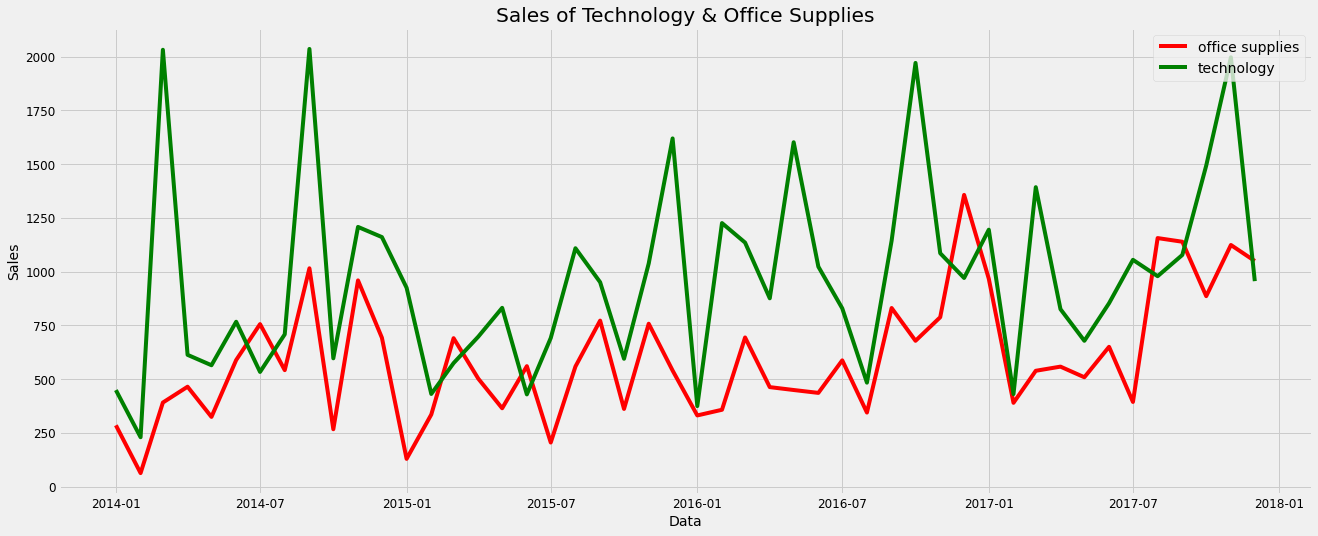

In [14]:
#So, now we have Office Supplies and Technology.
office = df.loc[df['Category'] == 'Office Supplies']
technology = df.loc[df['Category'] == 'Technology']
office.shape, technology.shape
cols = ['Row ID','Order ID', 'Ship Date', 'Ship Mode', 'Customer ID','Customer Name','Segment','Country','City','State','Postal Code','Region','Product ID',
        'Category','Sub-Category','Product Name','Quantity','Discount','Profit']
office.drop(cols, axis=1, inplace=True)
technology.drop(cols, axis=1, inplace=True)

office = office.sort_values('Order Date')
technology = technology.sort_values('Order Date')
office = office.groupby('Order Date')['Sales'].sum().reset_index()
technology = technology.groupby('Order Date')['Sales'].sum().reset_index()
office = office.set_index('Order Date')
technology = technology.set_index('Order Date')
y_office = office['Sales'].resample('MS').mean()
y_technology = technology['Sales'].resample('MS').mean()

office = pd.DataFrame({'Order Date':y_office.index, 'Sales':y_office.values})
technology = pd.DataFrame({'Order Date':y_technology.index, 'Sales': y_technology.values})

store = technology.merge(office,how= 'inner',on='Order Date')
store.rename(columns={'Sales_x': 'technology_sales','Sales_y': 'office_sales' }, inplace = True)
store.head()

plt.figure(figsize=(20,8))
plt.plot(store['Order Date'], store['office_sales'], 'r-', label = 'office')
plt.plot(store['Order Date'], store['technology_sales'], 'g-', label = 'technology')

plt.xlabel('Data')
plt.ylabel('Sales')
plt.title('Sales of Technology & Office Supplies')
plt.legend(["office supplies","technology"],loc= "upper right")

**Using FB Prophet**

In [17]:
!pip install pystan==2.19
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.2 MB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6272049 sha256=3bd2a39c71eef65f3329d59942f3b4f36ce4f87a517614e77aeb49df98972f02
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.8
    Uninstalling cmdstanpy-1.0.8:
      Successfully uninstalled cmdstanpy-1.0.8
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
prophet 1.1.1 requires cmdstanpy>=1.0.4, but you have cmdstanpy 0.9.5 which is incompatible.


In [18]:
#Furniture
furniture = df.loc[df['Category'] == 'Furniture']
furniture['Order Date'].min(), furniture['Order Date'].max()
cols = ['Row ID','Order ID', 'Ship Date', 'Ship Mode', 'Customer ID','Customer Name','Segment','Country','City','State','Postal Code','Region','Product ID',
        'Category','Sub-Category','Product Name','Quantity','Discount','Profit']
furniture.drop(cols, axis=1, inplace = True)
furniture = furniture.sort_values('Order Date')
furniture.isnull().sum()
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture = furniture.set_index('Order Date')
y_furniture = furniture['Sales'].resample('MS').mean()

#Technology
technology = df.loc[df['Category'] == 'Technology']
technology['Order Date'].min(), technology['Order Date'].max()
cols = ['Row ID','Order ID', 'Ship Date', 'Ship Mode', 'Customer ID','Customer Name','Segment','Country','City','State','Postal Code','Region','Product ID',
        'Category','Sub-Category','Product Name','Quantity','Discount','Profit']
technology.drop(cols, axis=1, inplace = True)
technology = technology.sort_values('Order Date')
technology.isnull().sum()
technology = technology.groupby('Order Date')['Sales'].sum().reset_index()
technology = technology.set_index('Order Date')
y_technology = technology['Sales'].resample('MS').mean()

#Office Supplies
office = df.loc[df['Category'] == 'Office Supplies']
office['Order Date'].min(), office['Order Date'].max()
cols = ['Row ID','Order ID', 'Ship Date', 'Ship Mode', 'Customer ID','Customer Name','Segment','Country','City','State','Postal Code','Region','Product ID',
        'Category','Sub-Category','Product Name','Quantity','Discount','Profit']
office.drop(cols, axis=1, inplace = True)
office = office.sort_values('Order Date')
office.isnull().sum()
office = office.groupby('Order Date')['Sales'].sum().reset_index()
office = office.set_index('Order Date')
y_office = office['Sales'].resample('MS').mean()

furniture = pd.DataFrame({'Order Date':y_furniture.index, 'Sales':y_furniture.values})
technology = pd.DataFrame({'Order Date':y_technology.index, 'Sales': y_technology.values})
office = pd.DataFrame({'Order Date':y_office.index, 'Sales': y_office.values})
print(furniture.head())




  Order Date       Sales
0 2014-01-01  480.194231
1 2014-02-01  367.931600
2 2014-03-01  857.291529
3 2014-04-01  567.488357
4 2014-05-01  432.049188


In [19]:
from fbprophet import Prophet


technology = technology.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
technology_model = Prophet(interval_width = 0.95)
technology_model.fit(technology)
furniture = furniture.rename(columns={'Order Date':'ds', 'Sales': 'y'})
furniture_model = Prophet(interval_width=0.95)
furniture_model.fit(furniture)


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [20]:

technology_forecast = technology_model.make_future_dataframe(periods=36, freq='MS')
technology_forecast = technology_model.predict(technology_forecast)
furniture_forecast = furniture_model.make_future_dataframe(periods=36, freq='MS')
furniture_forecast = furniture_model.predict(furniture_forecast)

Text(0.5, 1.0, 'Technology Sales')

<Figure size 1296x432 with 0 Axes>

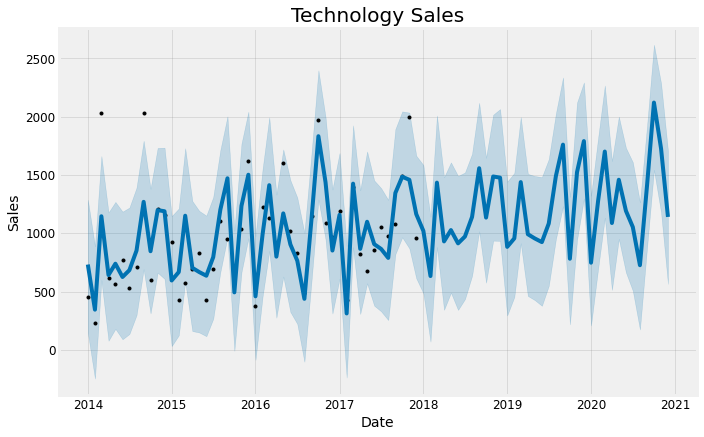

In [21]:
plt.figure(figsize=(18,6))
technology_model.plot(technology_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Technology Sales')

Text(0.5, 1.0, 'Furniture Sales')

<Figure size 1440x720 with 0 Axes>

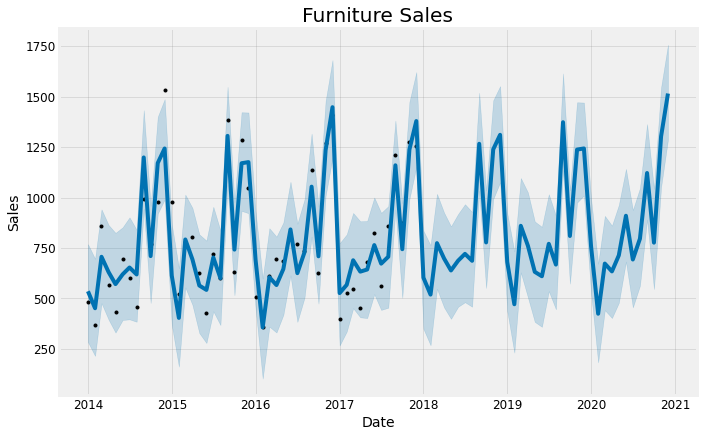

In [22]:
plt.figure(figsize=(20,10))
furniture_model.plot(furniture_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Furniture Sales')

In [23]:
#Comparing Forecast
technology_names = ['technology_%s' % column for column in technology_forecast.columns]
furniture_names = ['furniture_%s' % column for column in furniture_forecast.columns]


merge_technology_forecast = technology_forecast.copy()
merge_furniture_forecast = furniture_forecast.copy()


merge_technology_forecast.columns = technology_names
merge_furniture_forecast.columns = furniture_names


forecast = pd.merge(merge_technology_forecast, merge_furniture_forecast, how = 'inner', left_on = 'technology_ds', right_on = 'furniture_ds')

forecast = forecast.rename(columns={'technology_ds': 'Date'}).drop('furniture_ds', axis=1)
forecast.head()

,Date,technology_trend,technology_yhat_lower,technology_yhat_upper,technology_trend_lower,technology_trend_upper,technology_additive_terms,technology_additive_terms_lower,technology_additive_terms_upper,technology_yearly,...,furniture_additive_terms,furniture_additive_terms_lower,furniture_additive_terms_upper,furniture_yearly,furniture_yearly_lower,furniture_yearly_upper,furniture_multiplicative_terms,furniture_multiplicative_terms_lower,furniture_multiplicative_terms_upper,furniture_yhat
0,2014-01-01,952.355848,146.233007,1287.117483,952.355848,952.355848,-220.575922,-220.575922,-220.575922,-220.575922,...,-190.685662,-190.685662,-190.685662,-190.685662,-190.685662,-190.685662,0.0,0.0,0.0,535.372051
1,2014-02-01,958.476983,-246.872907,887.989095,958.476983,958.476983,-613.862112,-613.862112,-613.862112,-613.862112,...,-276.377703,-276.377703,-276.377703,-276.377703,-276.377703,-276.377703,0.0,0.0,0.0,451.116320
2,2014-03-01,964.005750,598.438230,1661.921858,964.005750,964.005750,181.810553,181.810553,181.810553,181.810553,...,-22.389755,-22.389755,-22.389755,-22.389755,-22.389755,-22.389755,0.0,0.0,0.0,706.401580
3,2014-04-01,970.126885,78.217418,1178.343670,970.126885,970.126885,-328.523260,-328.523260,-328.523260,-328.523260,...,-100.141158,-100.141158,-100.141158,-100.141158,-100.141158,-100.141158,0.0,0.0,0.0,630.086487
4,2014-05-01,976.050565,180.001118,1268.637240,976.050565,976.050565,-237.352937,-237.352937,-237.352937,-237.352937,...,-160.815662,-160.815662,-160.815662,-160.815662,-160.815662,-160.815662,0.0,0.0,0.0,570.801960


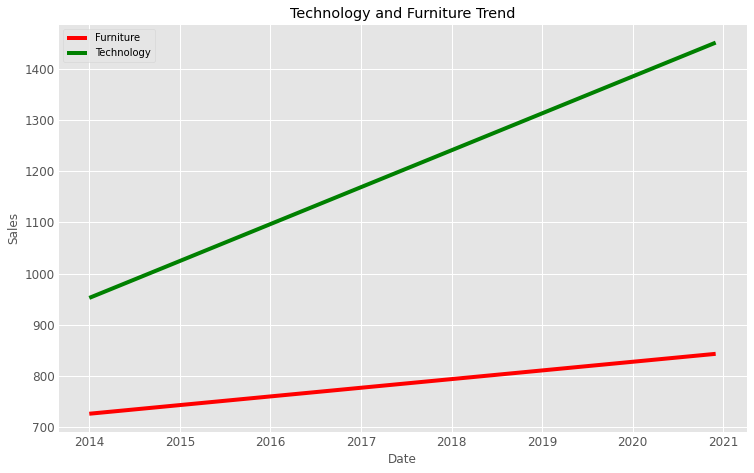

In [24]:

import matplotlib.pyplot as plt
plt.style.use('ggplot')
#Office Supplies
plt.figure(figsize=(11, 7))
plt.plot(forecast['Date'], forecast['furniture_trend'], 'r-')
plt.plot(forecast['Date'], forecast['technology_trend'], 'g-')


plt.legend(['Furniture','Technology'])
plt.xlabel('Date'); plt.ylabel('Sales')
plt.title('Technology and Furniture Trend');

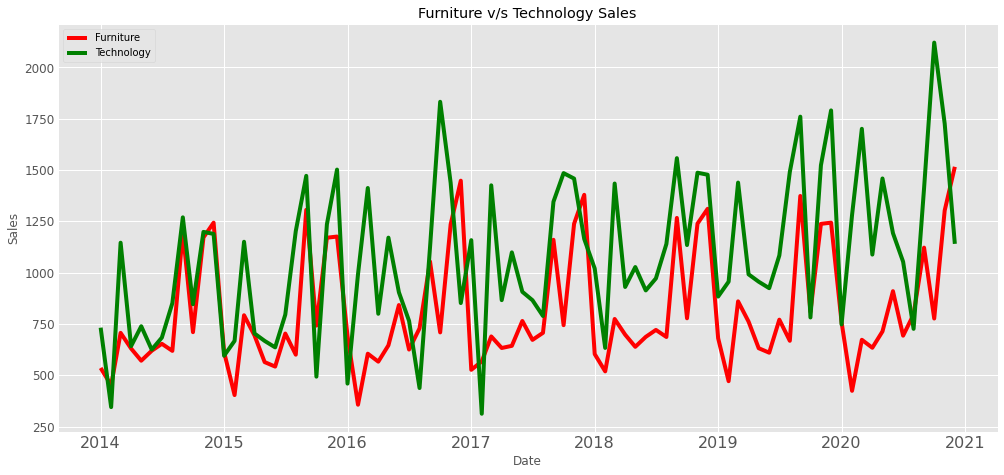

In [25]:
plt.figure(figsize=(15, 7))
plt.plot(forecast['Date'], forecast['furniture_yhat'], 'r-')
plt.plot(forecast['Date'], forecast['technology_yhat'], 'g-')
plt.legend(['Furniture','Technology']); plt.xlabel('Date'); plt.ylabel('Sales')
plt.tick_params(axis='x', labelsize=16)
plt.title('Furniture v/s Technology Sales');

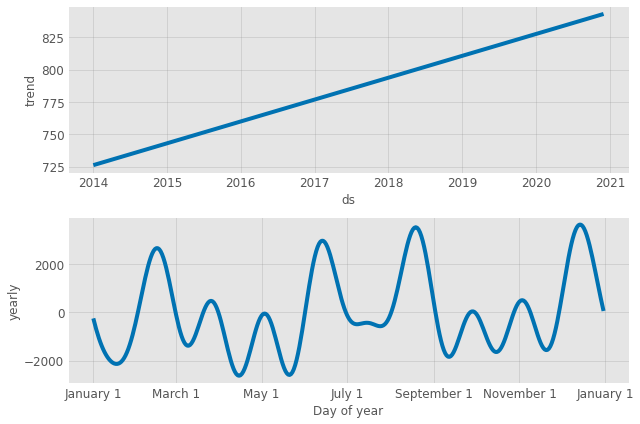

In [26]:

furniture_model.plot_components(furniture_forecast);

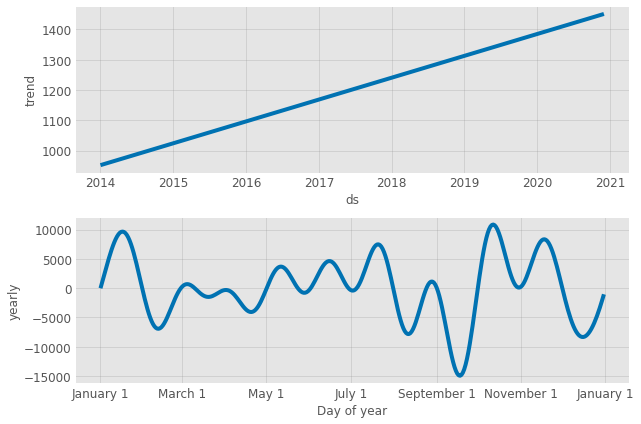

In [27]:
technology_model.plot_components(technology_forecast);